### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Reading csv file that we'll be using

In [3]:
df = pd.read_csv(r"C:\Users\Germán\Github\Data_Analysis_Project1\Data\data.csv")

### Initial data inspection

In [4]:
df.head(5)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
1,CAM0002,NaN,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.9479,9459.0,NaN,921078.0,3.78,29.0,NaN,NaN,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,NaN,7168.0,0.0517,51142.0,3.64,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.6157,7190.0,0.3579,191887.0,2.64,67.0,24/4/2023,26/1/2023,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,NaN,1794.0,0.0544,167241.0,1.02,40.0,10/1/2023,1/1/2023,5.0,6.0,Low


In [16]:
df["Impressions"].max()

np.float64(99916600.0)

In [17]:
df["Impressions"].min()

# Este tipo de datos con tanta diferencia podria escalarlos pero con que proposito? luego saco una media?

np.float64(1593.0)

In [7]:
df.shape # To see dimensions

(5000, 19)

In [70]:
df.dtypes 

Campaign_ID                object
Channel                    object
Product_Category           object
Region                     object
Budget                    float64
Spend                     float64
Impressions               float64
Clicks                    float64
CTR                       float64
Conversions               float64
CR                        float64
Revenue                   float64
ROI                       float64
Duration                  float64
Start_Date                 object
End_Date                   object
Customer_Satisfaction     float64
Campaign_Effectiveness    float64
Market_Segment             object
dtype: object

In [11]:
df.duplicated().sum()

np.int64(0)

### Columns Nulls (%)

In [10]:
df.isnull().sum() / df.shape[0] * 100 #La cantidad de datos nulos en porcentaje por Columna

Campaign_ID                5.18
Channel                    5.08
Product_Category           5.34
Region                     5.22
Budget                    10.00
Spend                      9.98
Impressions               10.08
Clicks                     9.72
CTR                        9.96
Conversions                9.88
CR                         9.92
Revenue                   10.18
ROI                        9.90
Duration                   9.58
Start_Date                 5.18
End_Date                   5.14
Customer_Satisfaction      9.84
Campaign_Effectiveness     9.80
Market_Segment             5.24
dtype: float64

<Axes: >

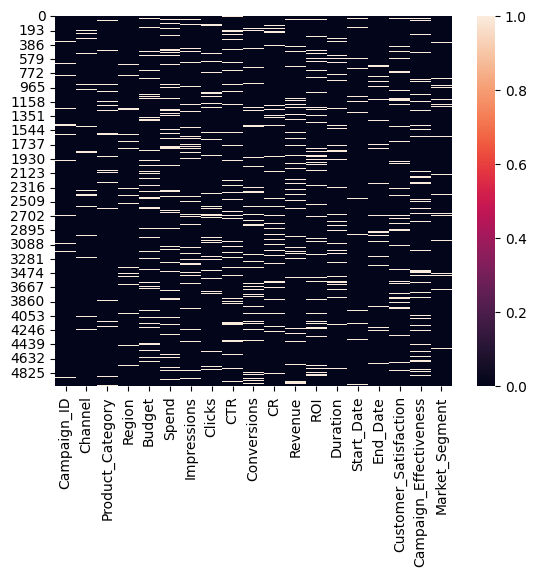

In [12]:
sns.heatmap(df.isnull(), cbar=True)

### Rows Nulls

In [13]:
nulls_by_row = (df.isnull().sum(axis=1)).sort_values(ascending=False)
nulls_by_row

#Vemos que la fila a la que más datos le faltan son 7, por lo tanto no vale la pena eliminarlas, vamos a intentar arreglarlas. 

1250    7
1669    7
2321    7
2694    7
1117    6
       ..
3963    0
3962    0
3950    0
3941    0
4976    0
Length: 5000, dtype: int64

### Numeric Columns means values

In [78]:
#Here im deciding if i should fix Nulls by mean values on every single numeric column
# df.select_dtypes(include = "number").mean().round(1) another way to do it
mean_values = df.mean(numeric_only=True).round(1)
mean_values

Budget                    319676.6
Spend                     275463.7
Impressions               605086.5
Clicks                     27467.0
CTR                            0.6
Conversions                 5591.9
CR                             0.6
Revenue                   596220.8
ROI                            2.8
Duration                     200.6
Customer_Satisfaction          3.5
Campaign_Effectiveness         6.4
dtype: float64

### FILLING NUMERIC VALUES

In [79]:
df_numeric_filled = df.fillna(mean_values)

In [80]:
df_numeric_filled.isnull().sum() / df.shape[0] * 100 

# We can see that that we dont have nulls on numeric columns anymore

Campaign_ID               5.18
Channel                   5.08
Product_Category          5.34
Region                    5.22
Budget                    0.00
Spend                     0.00
Impressions               0.00
Clicks                    0.00
CTR                       0.00
Conversions               0.00
CR                        0.00
Revenue                   0.00
ROI                       0.00
Duration                  0.00
Start_Date                5.18
End_Date                  5.14
Customer_Satisfaction     0.00
Campaign_Effectiveness    0.00
Market_Segment            5.24
dtype: float64

<Axes: >

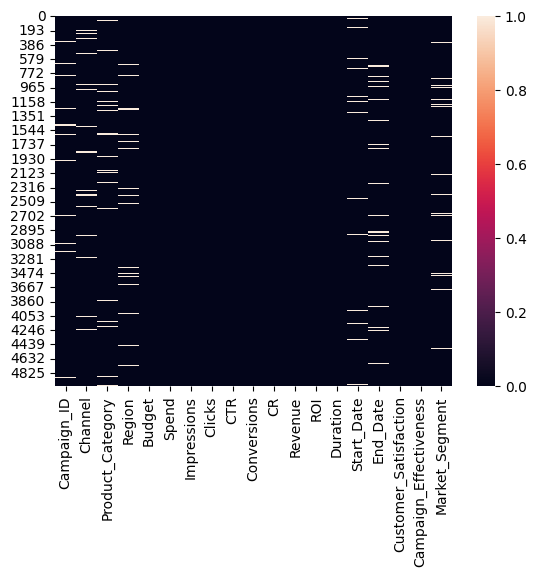

In [81]:
sns.heatmap(df_numeric_filled.isnull(), cbar=True)

In [82]:
# {Esto lo podemos hacer con un inplace al momento de hacer el fill pero quería ver los resultados en un nuevo data frame antes de agregarlos a la original. 
# (df.fillna(df.mean(), inplace=True)}
df = df_numeric_filled

In [83]:
df.isnull().sum() / df.shape[0] * 100 

Campaign_ID               5.18
Channel                   5.08
Product_Category          5.34
Region                    5.22
Budget                    0.00
Spend                     0.00
Impressions               0.00
Clicks                    0.00
CTR                       0.00
Conversions               0.00
CR                        0.00
Revenue                   0.00
ROI                       0.00
Duration                  0.00
Start_Date                5.18
End_Date                  5.14
Customer_Satisfaction     0.00
Campaign_Effectiveness    0.00
Market_Segment            5.24
dtype: float64

### FILL STR VALUES

El caso es que puedo utilizar la moda pero primero seria bueno analizar cuantas veces se repite la moda en cada columna ya que la moda puede tener una frecuencia no muy superior a otro valor por ejemplo puede ser 10 veces cuando otro valor quizas se repite 9
En ese caso no seria muy correcto utilizar la moda

Lo que yo haría: 

1- Ver cual es la moda <br/>
2- Ver cuantas veces se repite<br/>
3- Cuanto equivale del total de datos<br/>